## Basic Exploratory Data Analysis (EDA) with Python
Exploratory Data Analysis (EDA) is a crucial step in data analysis to summarize the main characteristics of a dataset. 
<br> Here's a basic, step-by-step approach you can follow using Python

In [3]:
#Load dataset to perform EDA on
import seaborn as sns

# Load the Titanic dataset
df = sns.load_dataset('titanic')

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


### Understanding the Dataset Structure:

- Load your dataset
- Identify the number of rows and columns.
- Understand what each column represents.
- Check the data types of each column (numeric, categorical, datetime, etc.).

In [10]:
import pandas as pd
import numpy as np

# Basic info
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB
None
   survived  pclass     sex   age  sibsp  parch     fare embarked  class  

### Basic Statistical Summaries:

- Use summary statistics (mean, median, mode, standard deviation) for numerical data.
- Count unique values and frequency for categorical data.
- Look for any unusual or unexpected values.

In [5]:
# Summary statistics for numerical data
print(df.describe())

# Count unique values for categorical data
for col in df.select_dtypes(include='object').columns:
    print(df[col].value_counts())

         survived      pclass         age       sibsp       parch        fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200
male      577
female    314
Name: sex, dtype: int64
S    644
C    168
Q     77
Name: embarked, dtype: int64
man      537
woman    271
child     83
Name: who, dtype: int64
Southampton    644
Cherbourg      168
Queenstown      77
Name: embark_town, dtype: int64
no     549
yes    342
Name: alive, dty

### Data Cleaning:

- Identify and handle missing values.
- Detect and correct errors or anomalies in the data.
- Consider normalizing or scaling data if necessary.

In [6]:
# Identify missing values
print(df.isnull().sum())

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


#### Strategies to Handle Missing Values
- Filling with a central tendency measure (mean, median, mode)
- Dropping columns with excessive missing values
- Using algorithms to predict missing values: This is more complex and often involves machine learning models to predict missing values based on other features.

In [ ]:
#Filling missing values with a central tendency measure (mean, median, mode)
# Age: fill with median
df['age'].fillna(df['age'].median(), inplace=True)

# Embarked: fill with mode
df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)

In [ ]:
# Dropping columns with excessive missing values:
# Cabin: drop due to excessive missing values
df.drop(columns=['Cabin'], inplace=True)

#### Identifying Outliers (IQR Method)
- Items above the upper and below the lower bounds are generally accepted as outliers in numeric data
- Dealing with them should involve attempting to discover why they exist first, then decide on how to approach them

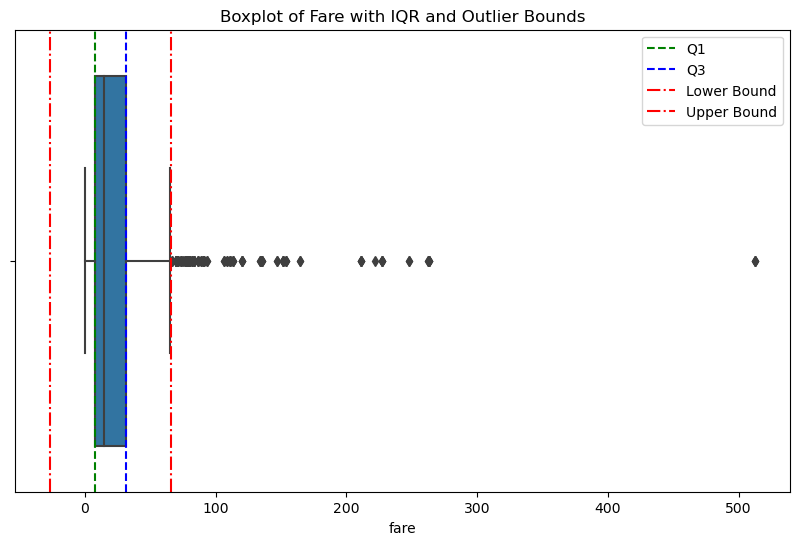

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your Titanic dataframe and you've already calculated Q1, Q3, and IQR
Q1 = df['fare'].quantile(0.25)
Q3 = df['fare'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Plotting
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['fare'])

# Adding lines for Q1, Q3, lower_bound and upper_bound
plt.axvline(x=Q1, color='green', linestyle='--', label='Q1')
plt.axvline(x=Q3, color='blue', linestyle='--', label='Q3')
plt.axvline(x=lower_bound, color='red', linestyle='-.', label='Lower Bound')
plt.axvline(x=upper_bound, color='red', linestyle='-.', label='Upper Bound')

plt.title('Boxplot of Fare with IQR and Outlier Bounds')
plt.legend()
plt.show()

### Strategies to Handle Outliers
#### Trimming (or Removing) Outliers
**What it does:** Trimming involves removing data points that are considered outliers from the dataset.
<br> **Effect on data:**
- Reduces size: The size of the dataset decreases because rows with outlier values are completely removed.
- Alters distribution: The distribution of the data may change significantly, especially if a significant number of outliers are removed.
- Loss of information: There is a risk of losing valuable information, especially if outliers are not just errors but represent rare, significant occurrences.

<br> **When to use:** Trimming is useful when outliers are due to data entry errors, measurement errors, or are not relevant to the analysis. It's also used when the focus is on the "typical" trend and not extreme values.
 
#### Capping (or Winsorizing) Outliers
**What it does:** Capping involves adjusting the outlier values to a certain threshold - typically set to the upper and lower bounds based on the data distribution (like IQR).
<br> **Effect on data:**
- Retains size: The size of the dataset remains unchanged since no data points are removed.
- Moderates extreme values: Outliers are reduced to a less extreme value, which can decrease the skewness of the data.
- Preserves information: As data points are not removed, information is retained, which can be important in certain analyses.

<br> **When to use:** Capping is useful when you want to lessen the impact of extreme values but don’t want to lose data points. It’s effective in situations where outliers are genuine but just unusually high or low.

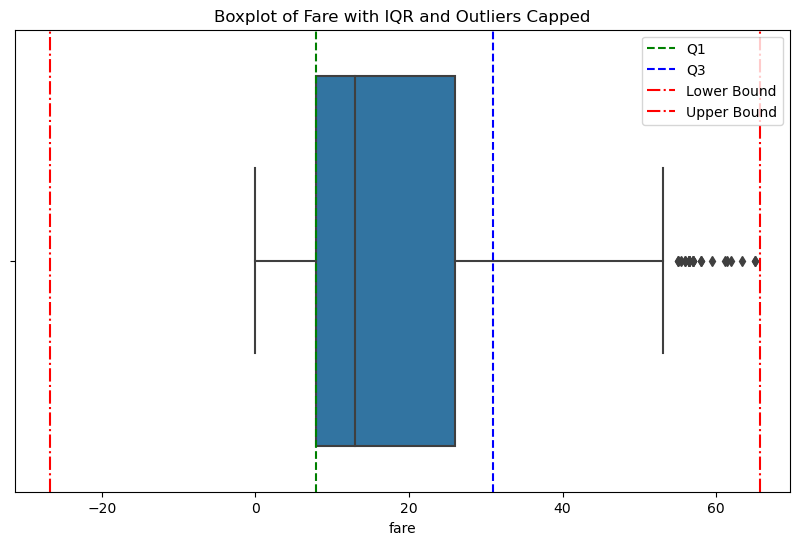

In [14]:
#Trimming outliers
df_trimmed = df[(df['fare'] >= lower_bound) & (df['fare'] <= upper_bound)]

# Plotting
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_trimmed['fare'])

# Adding lines for Q1, Q3, lower_bound and upper_bound
plt.axvline(x=Q1, color='green', linestyle='--', label='Q1')
plt.axvline(x=Q3, color='blue', linestyle='--', label='Q3')
plt.axvline(x=lower_bound, color='red', linestyle='-.', label='Lower Bound')
plt.axvline(x=upper_bound, color='red', linestyle='-.', label='Upper Bound')

plt.title('Boxplot of Fare with IQR and Outliers Capped')
plt.legend()
plt.show()

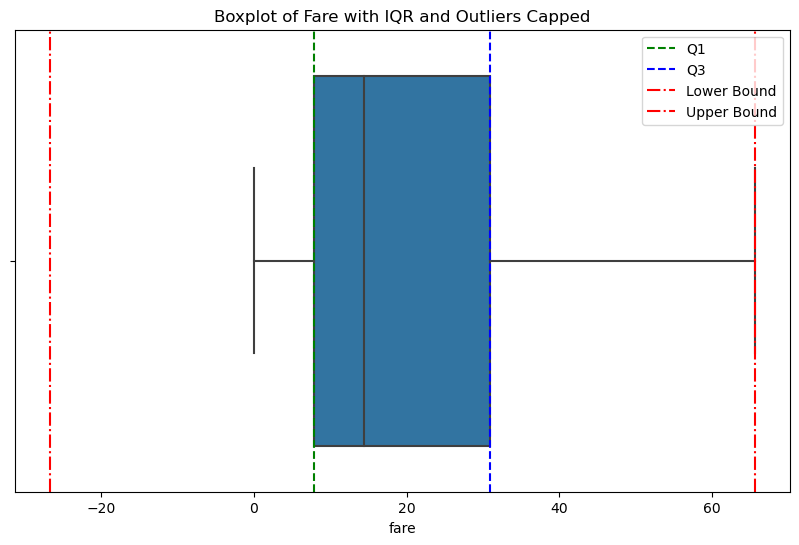

In [16]:
#Capping outliers (forces outliers to the upper or lower bounds)
df_capped = df.copy() #copy df to show how capping affects it
df_capped['fare'] = np.where(df_capped['fare'] > upper_bound, upper_bound, df_capped['fare'])
df_capped['fare'] = np.where(df_capped['fare'] < lower_bound, lower_bound, df_capped['fare'])

# Plotting
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_capped['fare'])

# Adding lines for Q1, Q3, lower_bound and upper_bound
plt.axvline(x=Q1, color='green', linestyle='--', label='Q1')
plt.axvline(x=Q3, color='blue', linestyle='--', label='Q3')
plt.axvline(x=lower_bound, color='red', linestyle='-.', label='Lower Bound')
plt.axvline(x=upper_bound, color='red', linestyle='-.', label='Upper Bound')

plt.title('Boxplot of Fare with IQR and Outliers Capped')
plt.legend()
plt.show()

### Visualization:

- Plot histograms or box plots for numerical data to understand distributions.
- Use bar charts or pie charts for categorical data to see frequency distributions.
- Scatter plots or pair plots can help identify relationships between variables.

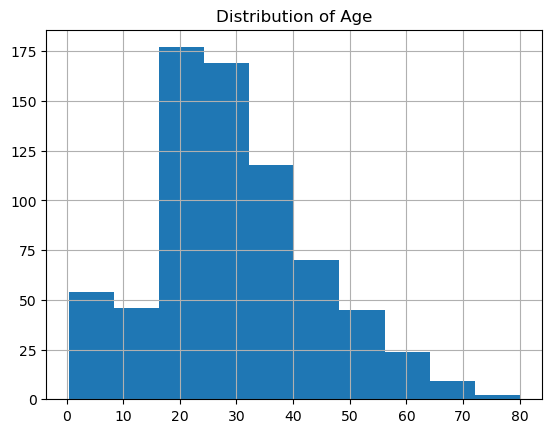

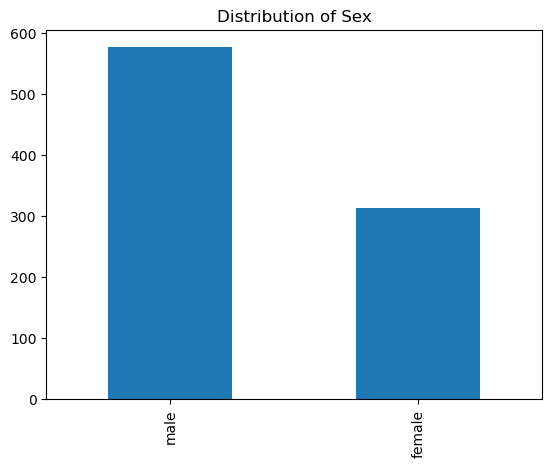

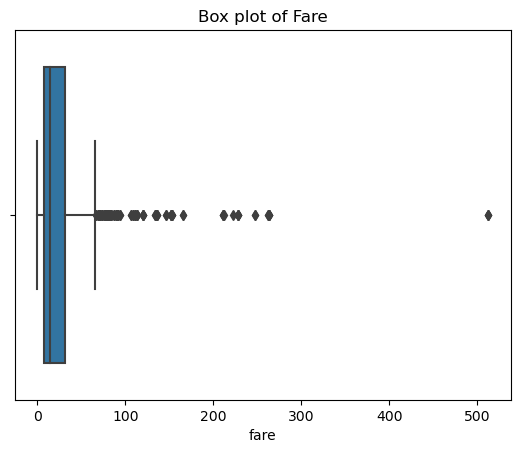

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram for Age
df['age'].hist()
plt.title('Distribution of Age')
plt.show()

# Bar chart for Sex
df['sex'].value_counts().plot(kind='bar')
plt.title('Distribution of Sex')
plt.show()

# Box plot for Fare
sns.boxplot(x='fare', data=df)
plt.title('Box plot of Fare')
plt.show()


### Correlation Analysis:

- Use correlation matrices to understand the relationship between numerical variables.
- Look for variables that are highly correlated with each other.

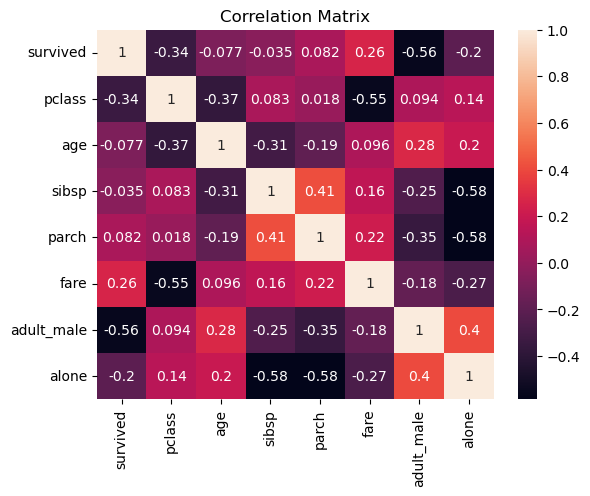

In [22]:
# Correlation matrix
corr_matrix = df.corr(numeric_only=True) #only look at numeric columns
sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()

### Handling Categorical Data:

- Use techniques like one-hot encoding or label encoding to convert categorical data into a numerical format for analysis.

In [23]:
# One-hot encoding for Embarked
df = pd.get_dummies(df, columns=['embarked'], drop_first=True)

# Label encoding for Sex
df['sex'] = df['sex'].map({'male': 0, 'female': 1})

In [24]:
# Examine changes quickly by looking at the head of the dataset
print(df.head())

   survived  pclass  sex   age  sibsp  parch     fare  class    who  \
0         0       3    0  22.0      1      0   7.2500  Third    man   
1         1       1    1  38.0      1      0  71.2833  First  woman   
2         1       3    1  26.0      0      0   7.9250  Third  woman   
3         1       1    1  35.0      1      0  53.1000  First  woman   
4         0       3    0  35.0      0      0   8.0500  Third    man   

   adult_male deck  embark_town alive  alone  embarked_Q  embarked_S  
0        True  NaN  Southampton    no  False           0           1  
1       False    C    Cherbourg   yes  False           0           0  
2       False  NaN  Southampton   yes   True           0           1  
3       False    C  Southampton   yes  False           0           1  
4        True  NaN  Southampton    no   True           0           1  


In [25]:
# Validate the encoding
# For one-hot encoded columns
for col in ['embarked_Q', 'embarked_S']:  # Add other columns if there are more categories
    print(df[col].value_counts())

# For label encoded columns
print(df['sex'].value_counts())

0    814
1     77
Name: embarked_Q, dtype: int64
1    644
0    247
Name: embarked_S, dtype: int64
0    577
1    314
Name: sex, dtype: int64


In [26]:
#Check for null values after handling categorical data
print(df.isnull().sum())

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
embarked_Q       0
embarked_S       0
dtype: int64


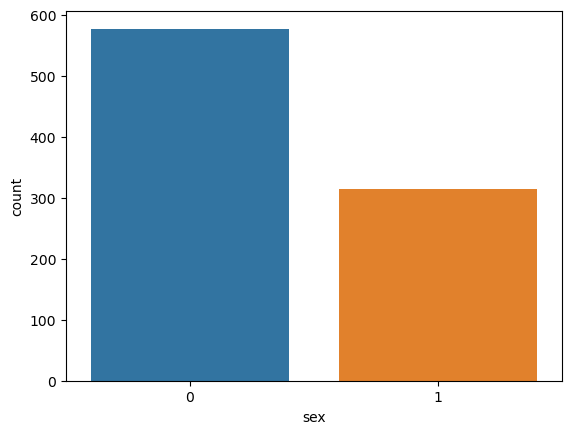

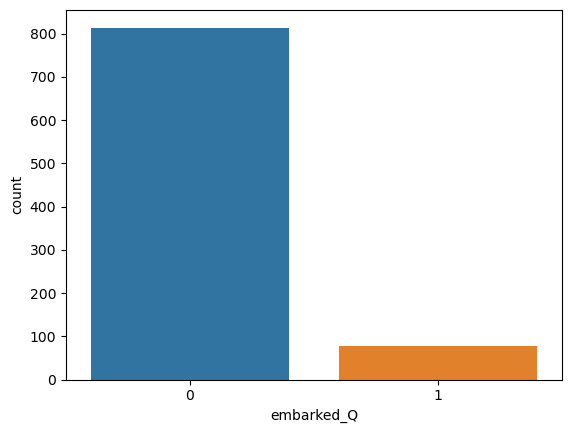

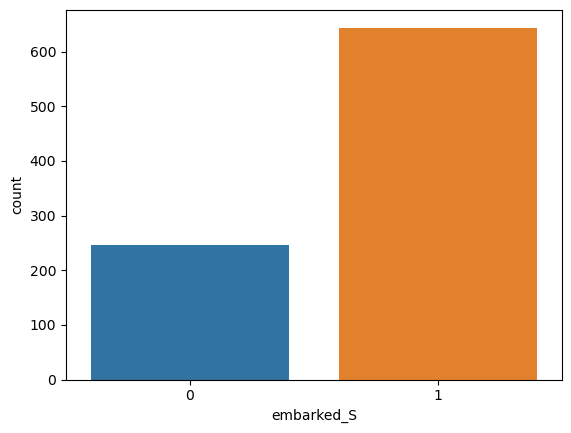

In [28]:
# Visualize
import seaborn as sns
import matplotlib.pyplot as plt

# Histogram for label encoded column
sns.countplot(x='sex', data=df)
plt.show()

# Bar plot for embarked_Q one-hot encoded columns
sns.countplot(x='embarked_Q', data=df)
plt.show()

# Bar plot for embarked_S one-hot encoded columns
sns.countplot(x='embarked_S', data=df)
plt.show()


### Feature Engineering (if applicable):

- Create new features that might be relevant for analysis or predictive modeling.
- Combine features, or create derived features from existing data.

In [29]:
# Creating a new feature: FamilySize
df['familySize'] = df['sibsp'] + df['parch'] + 1

In [30]:
#Quickly examine new feature 
print(df[['sibsp', 'parch', 'familySize']].head())

   sibsp  parch  familySize
0      1      0           2
1      1      0           2
2      0      0           1
3      1      0           2
4      0      0           1


In [31]:
#Exmaine summary stats for new feature
print(df['familySize'].describe())

count    891.000000
mean       1.904602
std        1.613459
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max       11.000000
Name: familySize, dtype: float64


In [32]:
#Check unique values
print(df['familySize'].value_counts())

1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: familySize, dtype: int64


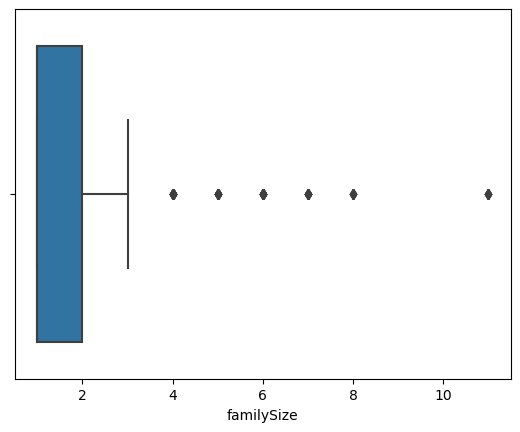

In [33]:
#Identify potential outliers
sns.boxplot(x=df['familySize'])
plt.show()

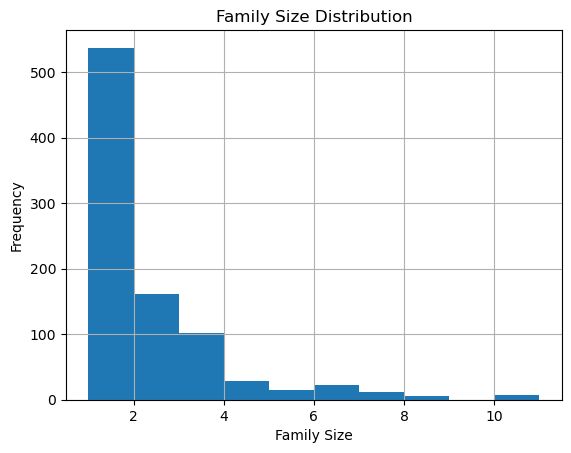

In [35]:
#Visualize
df['familySize'].hist(bins=range(1, df['familySize'].max() + 1))
plt.title('Family Size Distribution')
plt.xlabel('Family Size')
plt.ylabel('Frequency')
plt.show()


### Preliminary Insights:

- Note down any interesting trends or patterns observed.
- Identify potential hypotheses or questions for further investigation.

In [37]:
# Example: Analyzing survival rate by class
print(df.groupby('pclass')['survived'].mean())

pclass
1    0.629630
2    0.472826
3    0.242363
Name: survived, dtype: float64


#### Iterative Analysis:

EDA is often an iterative process. As you learn more about your data, revisit earlier steps and refine your analysis.